In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import csv

In [40]:
dataframe = pd.read_csv('Data/movie.metadata.tsv', sep='\t', names = ['Wikipedia MovieID', 'Freebase MovieID', 'Movie name', 'Movie release date', 'Movie Boxoffice Revenue','Movie runtime', 'Movie Languages', 'Movie COuntries', 'Movie genres' ])

# Afficher le tableau
display(dataframe)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/movie.metadata.tsv'

In [45]:
#Drop every movie with a NaN as a release date and create a new column Movie release year
dataframe2 = dataframe.copy(deep = True)
dataframe2 = dataframe2.dropna(subset=['Movie release date'])
dataframe2['Movie release Year'] = dataframe2['Movie release date'].str[0:4]
dataframe2['Movie release Year'] = pd.to_numeric(dataframe2['Movie release Year'], errors='raise') #Check si les strings sont autres que des nombres
dataframe2 = dataframe2.sort_values('Movie release Year', ascending=True) #Trier les films par ordre croissant des années

dataframe2.drop(62836, inplace=True) #Erreur sur la première valeur avec une année de 1010

display(dataframe2)

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year
57963,1082508,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1888
38764,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1889
53907,6431996,/m/0g53t3,"Monkeyshines, No. 1",1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1890
60249,22770416,/m/0gj9h_4,London's Trafalgar Square,1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1890
17849,27773121,/m/0cc8h1v,Newark Athlete,1891,NaN,0.20,{},{},"{""/m/02hmvc"": ""Short Film""}",1891
...,...,...,...,...,...,...,...,...,...,...
51429,25813358,/m/0gmbk1g,Avatar 2,2015,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",2015
8307,24179103,/m/0jwx0kc,"I, Robot 2",2015,NaN,NaN,{},{},"{""/m/06n90"": ""Science Fiction""}",2015
64862,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2016
30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},{},2016


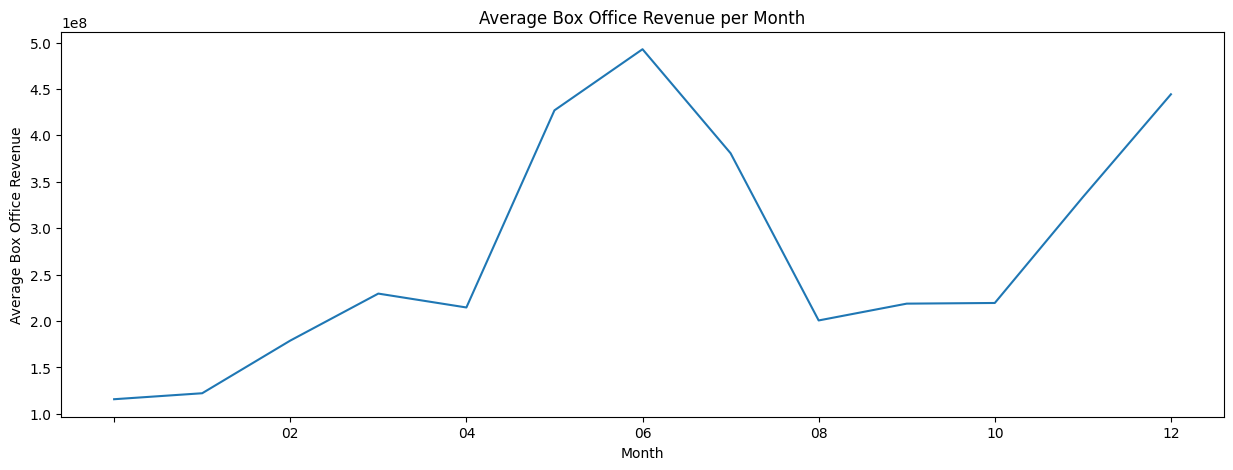

In [46]:
# group the data by month and year, and sum the box office revenue for each group
monthly_revenue = dataframe2.groupby([dataframe2['Movie release Year'], dataframe2['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()

# calculate the average revenue per month
average_monthly_revenue = monthly_revenue.groupby(level=1).mean()

# plot the data
average_monthly_revenue.plot(kind='line', figsize=(15,5), title='Average Box Office Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Average Box Office Revenue')
plt.show()


In [59]:
df3 = dataframe2.copy(deep = True)

# Define a regular expression pattern for the unwanted sequence
pattern = r'\{"/m/\d+\":'

# Replace the unwanted sequence with an empty string
dataframe2['Movie genres'] = dataframe2['Movie genres'].str.replace(pattern, '', regex=True)

# Get a list of all unique genres
genres = dataframe2['Movie genres'].str.split(',', expand=True).stack().str.strip().unique()

# Loop through the genres and filter the dataframe for each genre
for genre in genres:
    genre_df = dataframe2[dataframe2['Movie genres'].str.contains(genre, na=False)]
    #print(f"{genre}: {len(genre_df)} movies")



KeyboardInterrupt: 

In [13]:
# Split the genres and expand them into separate rows
expanded_genres = dataframe2['Movie genres'].str.split(',', expand=True).stack().reset_index(level=-1, drop=True)

# Create a new dataframe with expanded genres
dataframe_expanded_genres = dataframe2.drop('Movie genres', axis=1).join(expanded_genres.rename('Movie genres'))

# Create a list of dataframes, each representing a genre
genre_dataframes = [dataframe_expanded_genres[dataframe_expanded_genres['Movie genres'].str.contains(genre)] for genre in dataframe_expanded_genres['Movie genres'].unique()]

# count the number of movies in each genre
genre_counts = dataframe2['Movie genres'].str.split(',', expand=True).stack().str.strip().value_counts()

# select the top 10 genres with the most movies
top_genres = genre_counts.head(10).index.tolist()

# filter the genre dataframes to keep only the top 10 genres
top_genre_dataframes = [genre_df for genre_df in genre_dataframes if any(genre in genre_df['Movie genres'].values for genre in top_genres)]


In [58]:
#display(top_genre_dataframes[4])

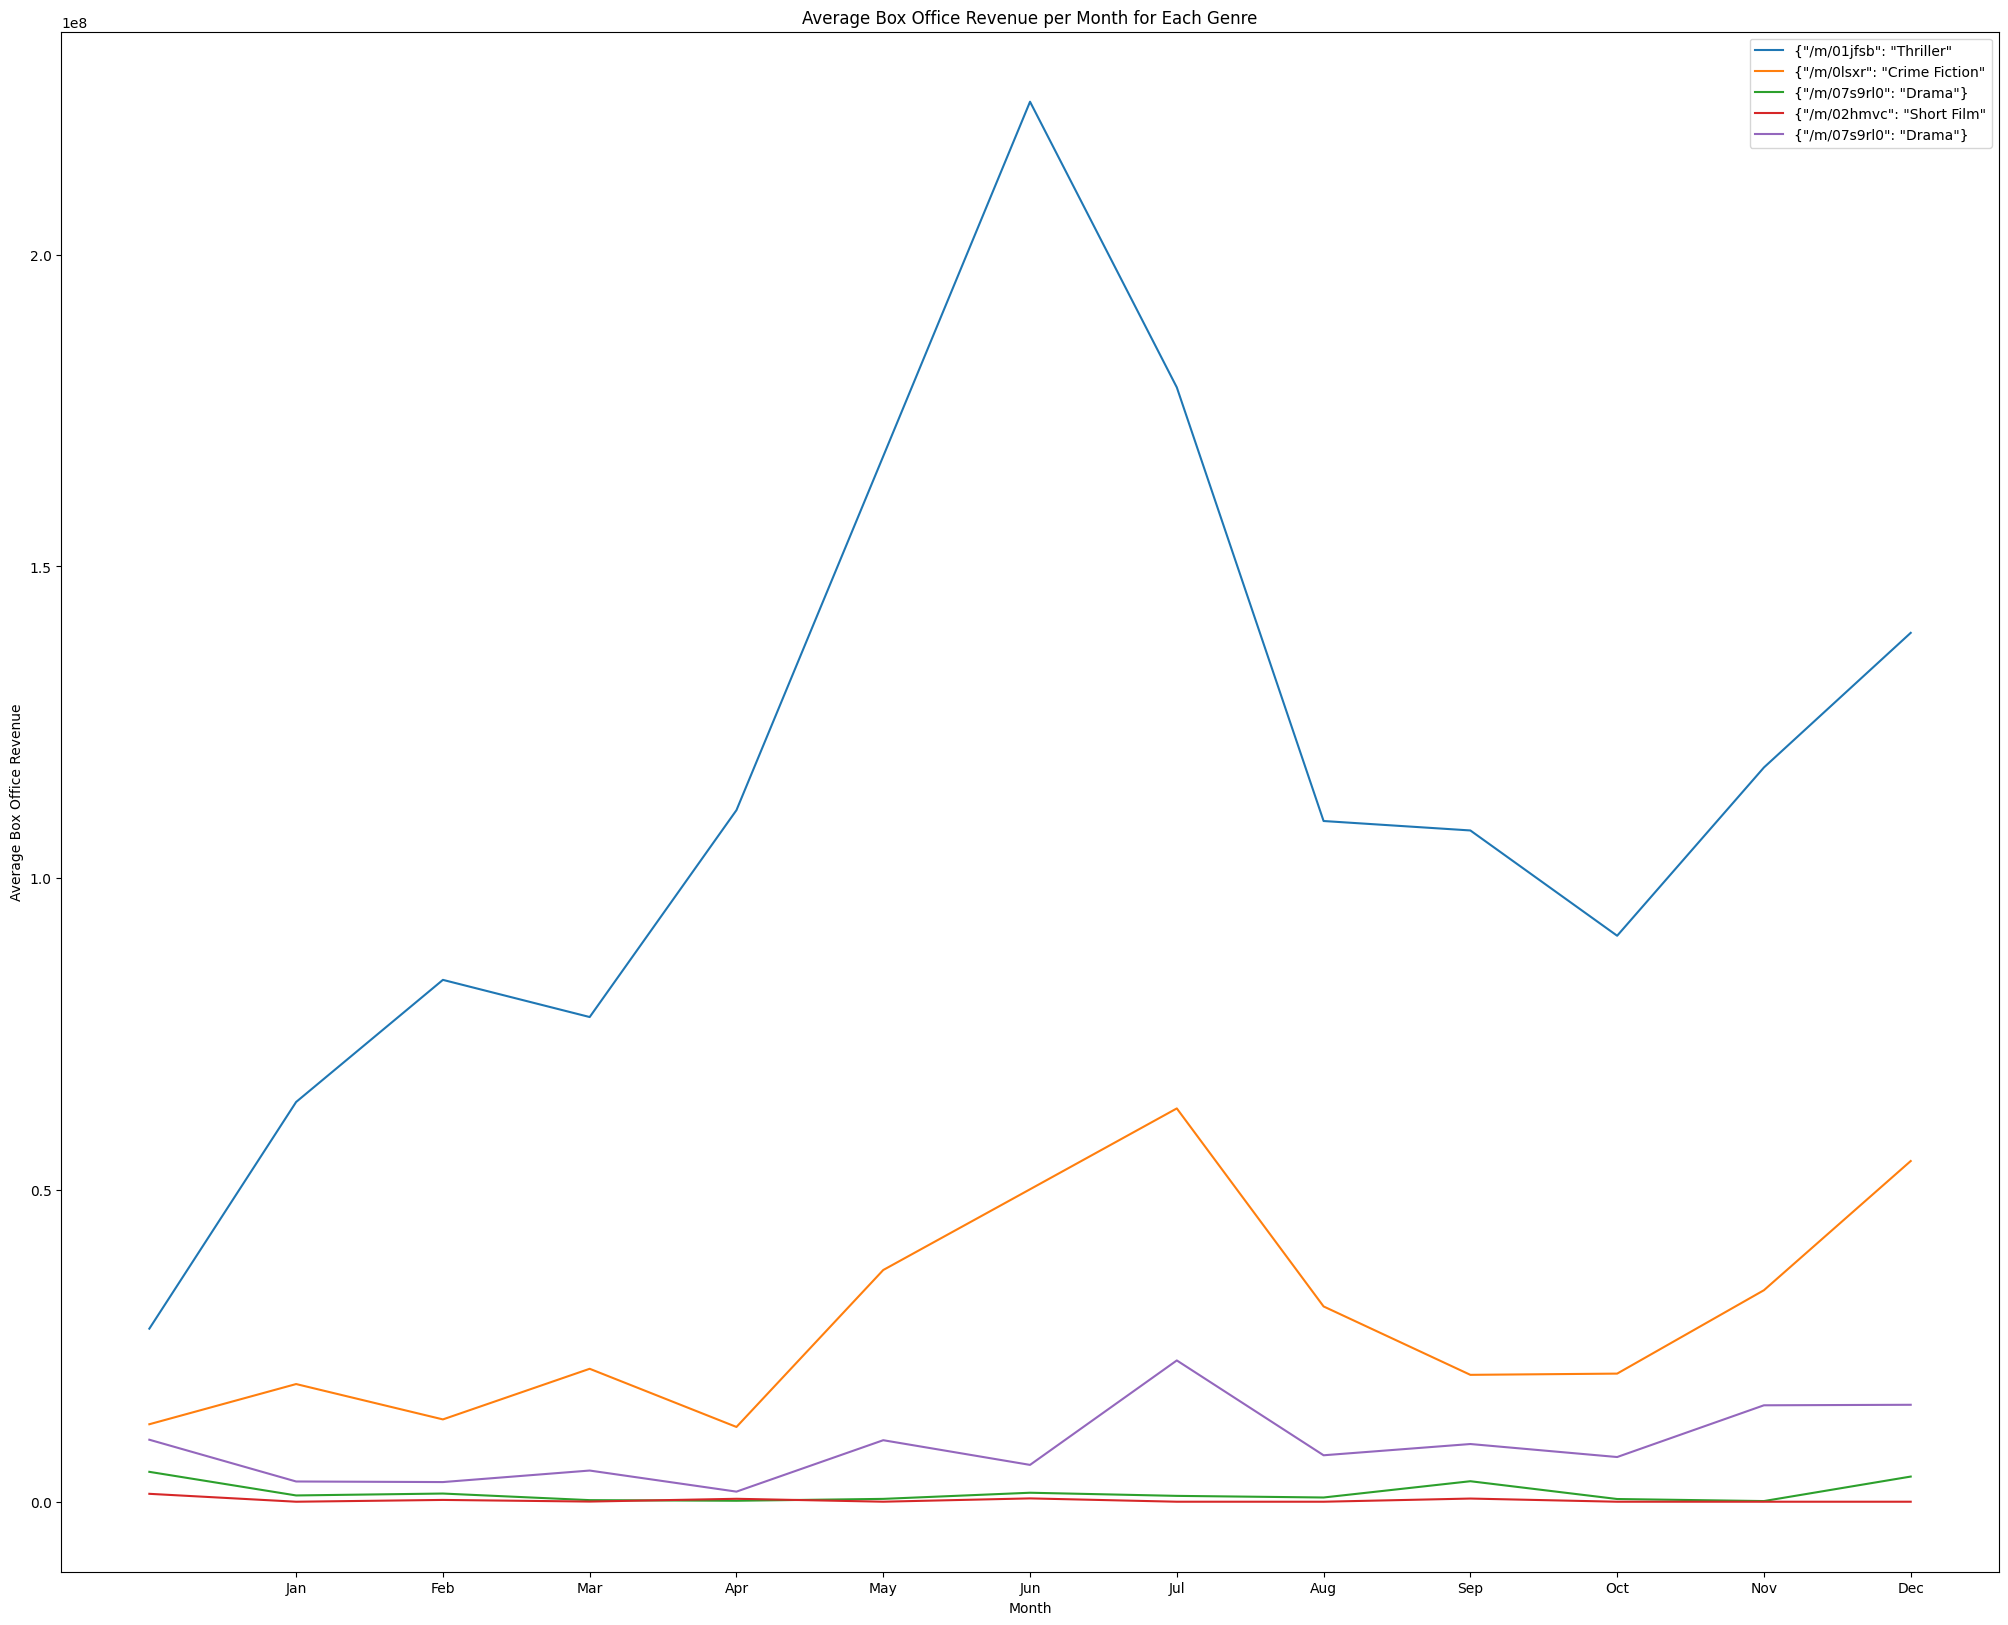

In [36]:
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(25, 20))

# List of month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Loop over dataframes
for genre_df in top_genre_dataframes:
    # Group the data by month and year, and sum the box office revenue for each group
    monthly_revenue = genre_df.groupby([genre_df['Movie release Year'], genre_df['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()

    # Calculate the average revenue per month
    average_monthly_revenue = monthly_revenue.groupby(level=1).mean()

    # Get the genre name
    genre_name = genre_df['Movie genres'].iloc[0]

    # Plot the data
    average_monthly_revenue.plot(kind='line', label=genre_name)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Box Office Revenue')
plt.title('Average Box Office Revenue per Month for Each Genre')

# Set x-axis labels to month names
plt.xticks(range(1, 13), month_names)

plt.legend()

# Show the plot
plt.show()

In [55]:
#Drop every movie with a NaN as a release date and create a new column Movie release year
dataframe2 = dataframe.copy(deep = True)
dataframe2 = dataframe2.dropna(subset=['Movie release date'])
dataframe2['Movie release Year'] = dataframe2['Movie release date'].str[0:4]
dataframe2['Movie release Year'] = pd.to_numeric(dataframe2['Movie release Year'], errors='raise') #Check si les strings sont autres que des nombres
dataframe2 = dataframe2.sort_values('Movie release Year', ascending=True) #Trier les films par ordre croissant des années

dataframe2.drop(62836, inplace=True) #Erreur sur la première valeur avec une année de 1010

df = dataframe2
# Remove the row which don't have the month of release:
df = df[df['Movie release date'].str.len() > 4]
df = df.reset_index()
#display(df)

In [56]:
import json 
import ast

# Create an empty dataframe
empty_frame = {'genre ID': [], 'genre name': []}
genres = pd.DataFrame(data=empty_frame)


#Iterate over all rows: takes so much time!!!
for index, row in df.iterrows():
    #print(index)
    # Convert the JSON strings to Python dictionaries
    df2 = df.iloc[index]['Movie genres']
    df3 = json.loads(df2)
    df4 = pd.json_normalize(df3)

    # Transpose the DataFrame to move the first row of column names to become a regular row
    df5 = df4.T.reset_index()
    df5 = df5.rename(columns={'index': 'genre ID', 0: 'genre name'})

    #frames = [d, df5]
    # concatenate infos in rowq
    genres = pd.concat([genres, df5])

# delete all repeated values
genres = genres.drop_duplicates()

In [57]:
# enlever un warning
pd.options.mode.chained_assignment = None  # default='warn'

# Create empty column for 2 main genres
df['genre 1']= None
df['genre 2'] = None

# Iterate over rows of df
for index, row in df.iterrows():

    df2 = df.iloc[index]['Movie genres']
    df3 = json.loads(df2)
    df4 = pd.json_normalize(df3)

    if df4.shape[1]>0:
        df['genre 1'].iloc[index] = df4.iloc[0, 0]

        if df4.shape[1]>1:
            df['genre 2'].iloc[index] = df4.iloc[0, 1]

df.head()

,index,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year,genre 1,genre 2
0,39307,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892,Short Film,Silent film
1,14231,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892,Short Film,Silent film
2,50565,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892,Short Film,Silent film
3,67253,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894,Short Film,Silent film
4,15682,10094757,/m/02q1md8,Chinese Opium Den,1894-10-01,NaN,1.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894,Short Film,Silent film


In [71]:
import pandas as pd
# Get all unique genres for genre 1
unique_genres1 = pd.Series(df['genre 1'].unique())

# Get all unique genres for genre 2
unique_genres2 = pd.Series(df['genre 2'].unique())

unique_genres_all = pd.concat([unique_genres1,unique_genres2]).unique()
#unique_genres_all

In [77]:
drama_genres = df[df['genre 1'].str.contains('Drama')|df['genre 2'].str.contains('Drama')]
#drama_genres

comedy_genres = df[df['genre 1'].str.contains('Comedy|Slapstick|Parody')|df['genre 2'].str.contains('Comedy|Slapstick|Parody')]
#comedy_genres

romance_genres = df[df['genre 1'].str.contains('Romance|Romantic')|df['genre 2'].str.contains('Romance|Romantic')]
#romance_genres

thriller_genres = df[df['genre 1'].str.contains('Thriller|Crime')|df['genre 2'].str.contains('Thriller|Crime')]
#thriller_genres


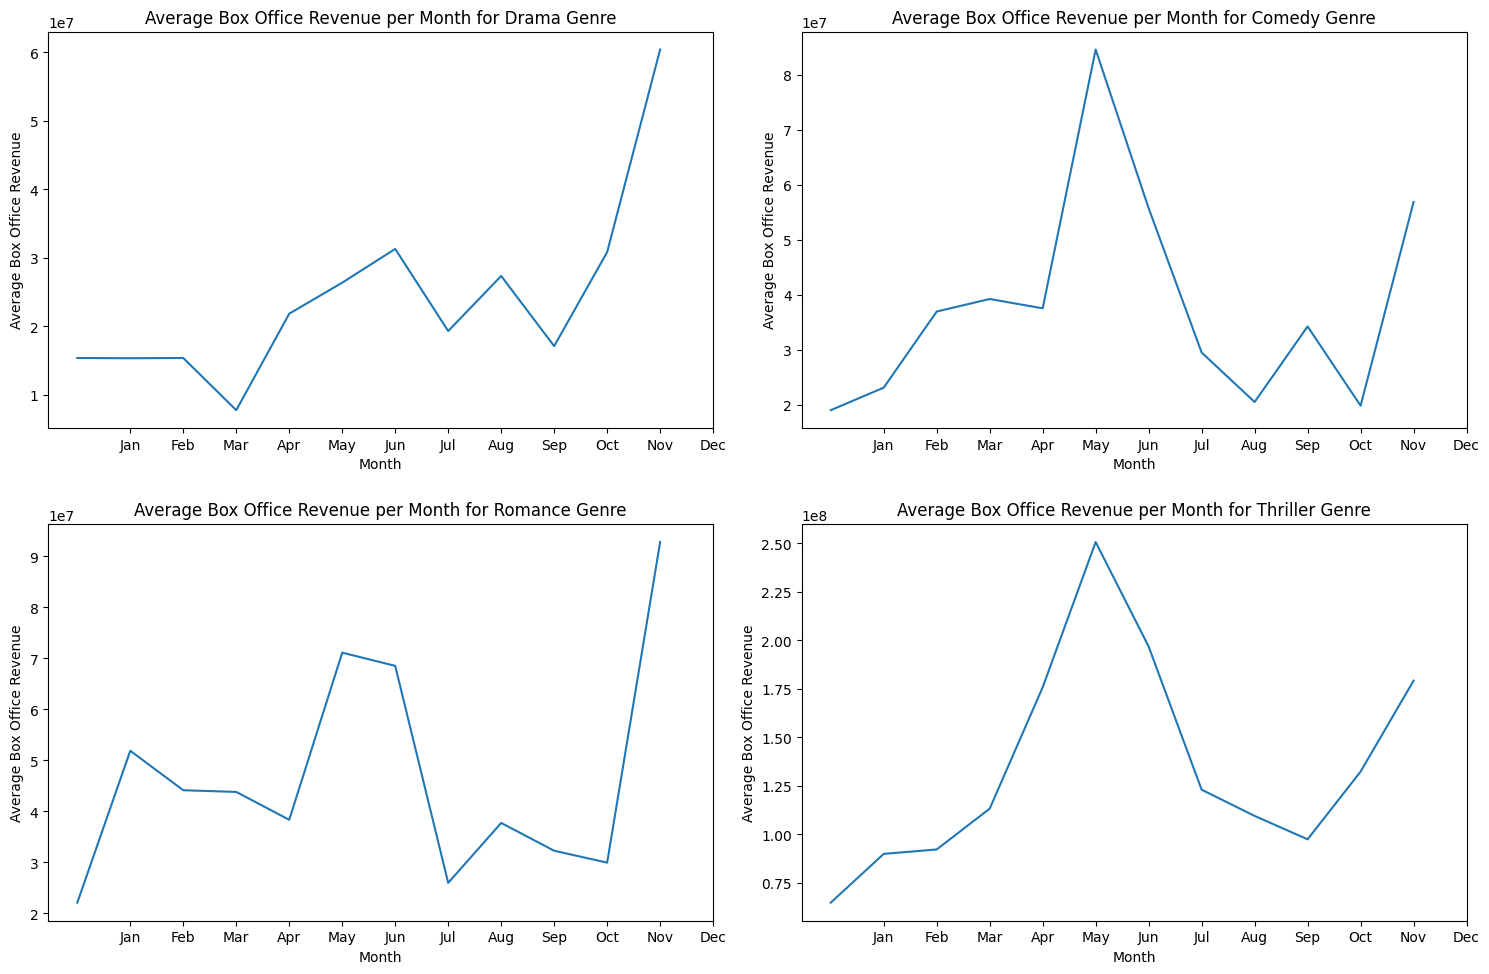

In [80]:
# group the data by month and year and genre, and sum the box office revenue for each group
monthly_revenue_drama = drama_genres.groupby([drama_genres['Movie release Year'], drama_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()
monthly_revenue_comedy = comedy_genres.groupby([comedy_genres['Movie release Year'], comedy_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()
monthly_revenue_romance = romance_genres.groupby([romance_genres['Movie release Year'], romance_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()
monthly_revenue_thriller = thriller_genres.groupby([thriller_genres['Movie release Year'], thriller_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()

# calculate the average revenue per month
average_monthly_revenue_drama = monthly_revenue_drama.groupby(level=1).mean()
average_monthly_revenue_comedy = monthly_revenue_comedy.groupby(level=1).mean()
average_monthly_revenue_romance = monthly_revenue_romance.groupby(level=1).mean()
average_monthly_revenue_thriller = monthly_revenue_thriller.groupby(level=1).mean()

# plot the data
fig, axs = plt.subplots(2, 2, figsize=(15,10))

average_monthly_revenue_drama.plot(ax=axs[0, 0], kind='line', title='Average Box Office Revenue per Month for Drama Genre')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Average Box Office Revenue')
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

average_monthly_revenue_comedy.plot(ax=axs[0, 1], kind='line', title='Average Box Office Revenue per Month for Comedy Genre')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Average Box Office Revenue')
axs[0, 1].set_xticks(range(1, 13))
axs[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

average_monthly_revenue_romance.plot(ax=axs[1, 0], kind='line', title='Average Box Office Revenue per Month for Romance Genre')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Average Box Office Revenue')
axs[1, 0].set_xticks(range(1, 13))
axs[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

average_monthly_revenue_thriller.plot(ax=axs[1, 1], kind='line', title='Average Box Office Revenue per Month for Thriller Genre')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Box Office Revenue')
axs[1, 1].set_xticks(range(1, 13))
axs[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


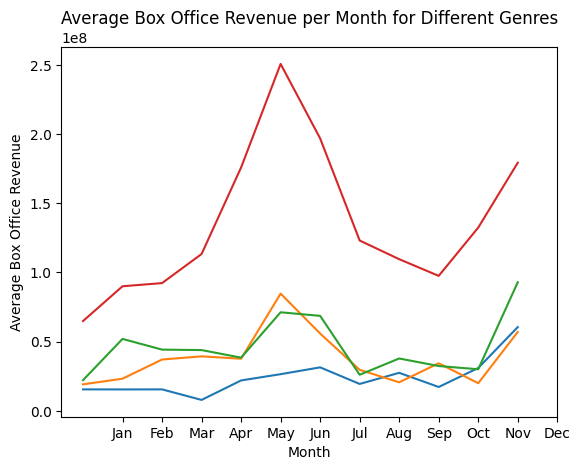

In [90]:
average_monthly_revenue_drama.plot( kind='line', title='Average Box Office Revenue per Month for Different Genres')
average_monthly_revenue_comedy.plot( kind='line')
average_monthly_revenue_romance.plot( kind='line')
average_monthly_revenue_thriller.plot( kind='line')

plt.xlabel('Month')
plt.ylabel('Average Box Office Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

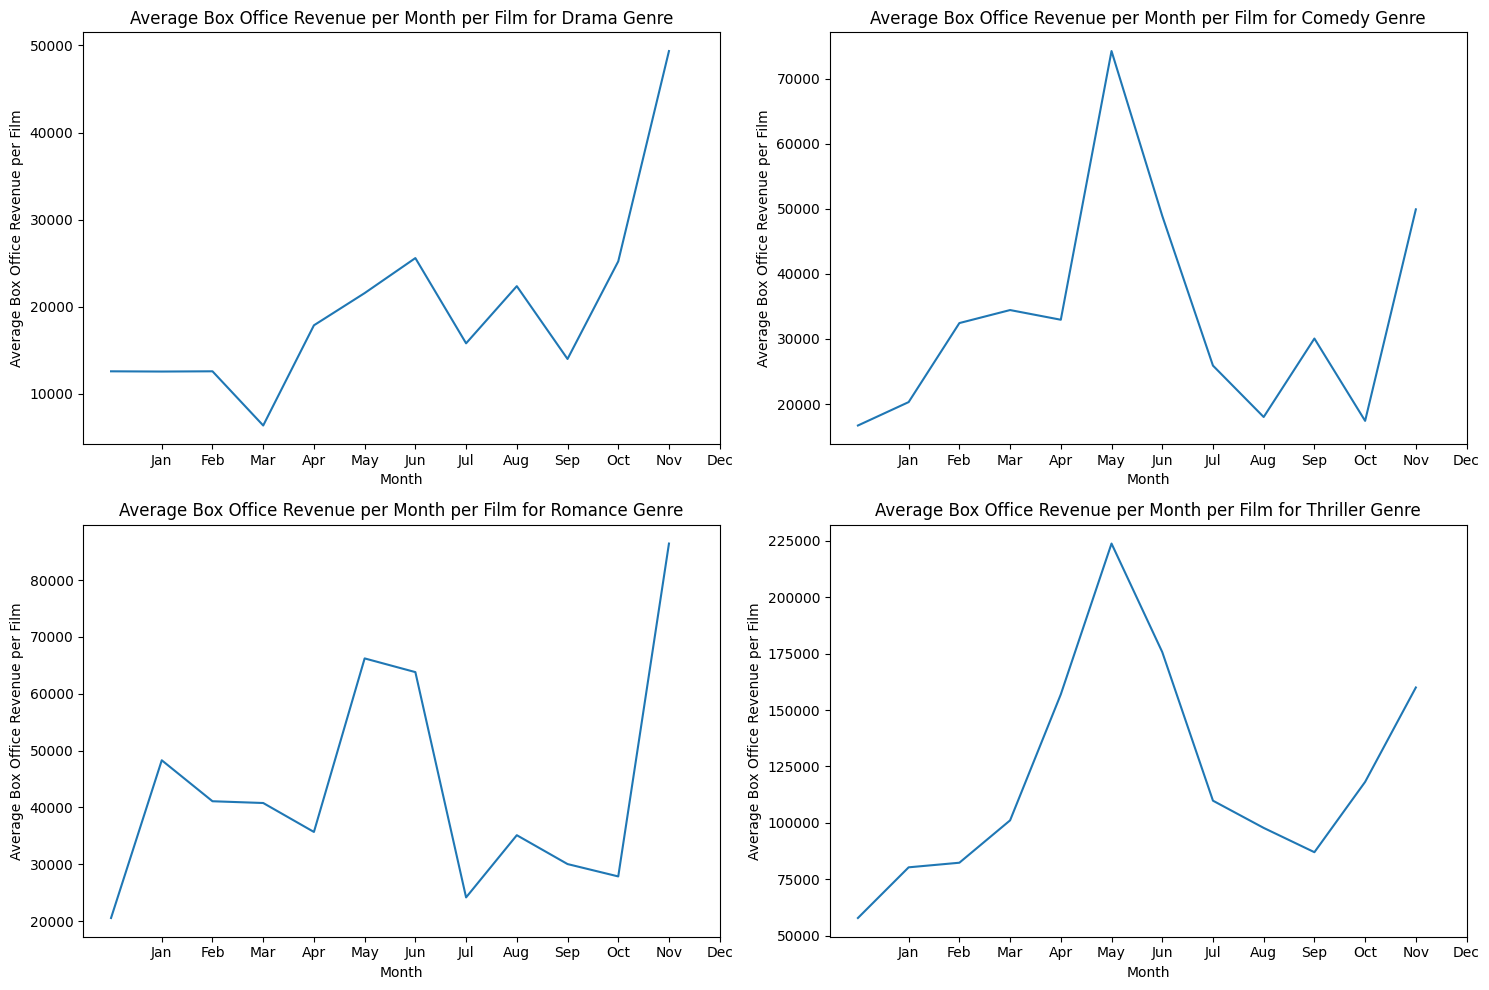

In [92]:
# group the data by month and year and genre, and sum the box office revenue for each group
monthly_revenue_drama2 = drama_genres.groupby([drama_genres['Movie release Year'], drama_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()
monthly_revenue_comedy2 = comedy_genres.groupby([comedy_genres['Movie release Year'], comedy_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()
monthly_revenue_romance2 = romance_genres.groupby([romance_genres['Movie release Year'], romance_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()
monthly_revenue_thriller2 = thriller_genres.groupby([thriller_genres['Movie release Year'], thriller_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()

# calculate the average revenue per month per movie
average_monthly_revenue_drama2 = monthly_revenue_drama2.groupby(level=1).mean() / len(drama_genres.groupby([drama_genres['Movie release Year'], drama_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'])
average_monthly_revenue_comedy2 = monthly_revenue_comedy2.groupby(level=1).mean() / len(comedy_genres.groupby([comedy_genres['Movie release Year'], comedy_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'])
average_monthly_revenue_romance2 = monthly_revenue_romance2.groupby(level=1).mean() / len(romance_genres.groupby([romance_genres['Movie release Year'], romance_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'])
average_monthly_revenue_thriller2 = monthly_revenue_thriller2.groupby(level=1).mean() / len(thriller_genres.groupby([thriller_genres['Movie release Year'], thriller_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'])

# plot the data
fig, axs = plt.subplots(2, 2, figsize=(15,10))

average_monthly_revenue_drama2.plot(ax=axs[0, 0], kind='line', title='Average Box Office Revenue per Month per Film for Drama Genre')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Average Box Office Revenue per Film')
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

average_monthly_revenue_comedy2.plot(ax=axs[0, 1], kind='line', title='Average Box Office Revenue per Month per Film for Comedy Genre')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Average Box Office Revenue per Film')
axs[0, 1].set_xticks(range(1, 13))
axs[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

average_monthly_revenue_romance2.plot(ax=axs[1, 0], kind='line', title='Average Box Office Revenue per Month per Film for Romance Genre')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Average Box Office Revenue per Film')
axs[1, 0].set_xticks(range(1, 13))
axs[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

average_monthly_revenue_thriller2.plot(ax=axs[1, 1], kind='line', title='Average Box Office Revenue per Month per Film for Thriller Genre')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Box Office Revenue per Film')
axs[1, 1].set_xticks(range(1, 13))
axs[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


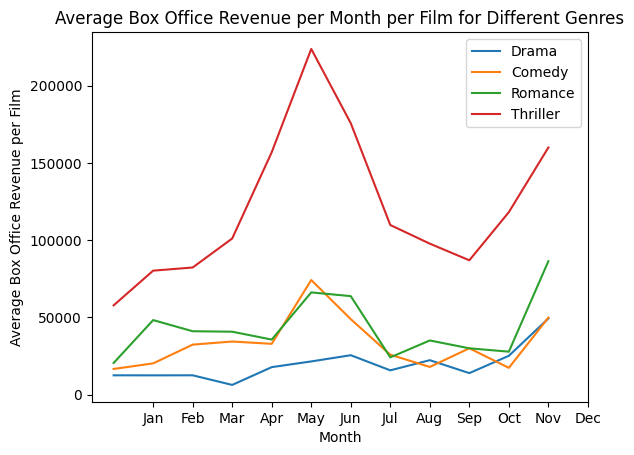

1224

1140

1074

1120

In [94]:
# group the data by month and year and genre, and sum the box office revenue for each group
monthly_revenue_drama2 = drama_genres.groupby([drama_genres['Movie release Year'], drama_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()
monthly_revenue_comedy2 = comedy_genres.groupby([comedy_genres['Movie release Year'], comedy_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()
monthly_revenue_romance2 = romance_genres.groupby([romance_genres['Movie release Year'], romance_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()
monthly_revenue_thriller2 = thriller_genres.groupby([thriller_genres['Movie release Year'], thriller_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'].sum()

# calculate the average revenue per month per movie
average_monthly_revenue_drama2 = monthly_revenue_drama2.groupby(level=1).mean() / len(drama_genres.groupby([drama_genres['Movie release Year'], drama_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'])
average_monthly_revenue_comedy2 = monthly_revenue_comedy2.groupby(level=1).mean() / len(comedy_genres.groupby([comedy_genres['Movie release Year'], comedy_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'])
average_monthly_revenue_romance2 = monthly_revenue_romance2.groupby(level=1).mean() / len(romance_genres.groupby([romance_genres['Movie release Year'], romance_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'])
average_monthly_revenue_thriller2 = monthly_revenue_thriller2.groupby(level=1).mean() / len(thriller_genres.groupby([thriller_genres['Movie release Year'], thriller_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue'])

# plot the data
plt.plot(average_monthly_revenue_drama2, label='Drama')
plt.plot(average_monthly_revenue_comedy2, label='Comedy')
plt.plot(average_monthly_revenue_romance2, label='Romance')
plt.plot(average_monthly_revenue_thriller2, label='Thriller')

plt.xlabel('Month')
plt.ylabel('Average Box Office Revenue per Film')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Average Box Office Revenue per Month per Film for Different Genres')
plt.legend()

plt.show()

display(len(drama_genres.groupby([drama_genres['Movie release Year'], drama_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue']))
display(len(comedy_genres.groupby([comedy_genres['Movie release Year'], comedy_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue']))
display(len(romance_genres.groupby([romance_genres['Movie release Year'], romance_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue']))
display(len(thriller_genres.groupby([thriller_genres['Movie release Year'], thriller_genres['Movie release date'].str[5:7]])['Movie Boxoffice Revenue']))
